In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlflow import MlflowClient
import seaborn
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from mlflow.models import infer_signature
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
# from utils import convert_bool_to_int
from sklearn.model_selection import train_test_split# Text pre-processing
import tensorflow as tf
from tensorflow.python.keras.callbacks import EarlyStopping# Modeling
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
from sklearn.svm import SVC
import ast
from sklearn.model_selection import train_test_split# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
import utils
import tqdm
from sklearn import preprocessing
from sklearn.model_selection import KFold
import calplot
from fast_ml.model_development import train_valid_test_split

2024-01-12 21:46:49.976665: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 21:46:50.011457: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-12 21:46:50.012075: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-12 21:46:50.642336: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:

feature_names = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    # "domain_len",
    # "sus_keyword",
    # "sus_tld",
    # "shannon_entropy",
    # "num_dashes",
    # "num_tokens",
    # "num_parts",
    # "token_is_tld",
    # "frac_special_char",
    # # "is_ip",  # no domain is strictly an ip
    # "is_international", # hefur engin áhrif í rf
    # "frac_vowels",
    # "frac_digits",
    # "has_digit_only_subdomain", # hefur engin áhrif í rf
    # "mean_len_subdomains",
    # # "valid_tld_iana", # every line has valid iana tld
    # "has_single_char_subdomain",
    # "char_diversity",
    # "alphabet_size",
    # "is_wildcard_match",
    # "has_wildcard_san",
    # "domain_pred",
    "phish"
]



feature_names_domain = [
    "validation_level",
    "apple_ever_valid",
    "nss_ever_valid",
    "microsoft_ever_valid",
    "subject_has_country",
    "subject_has_province",
    "subject_has_locality",
    "subject_has_common_name", # hefur engin áhrif í rf
    "subject_only_cn",
    # "num_subject_rdn",
    "subject_len", # hefur engin áhrif í rf
    "length_seconds",
    # "notice_numbers", # vantar hjá öllum certs
    "ocsp_urls", # hefur engin áhrif í rf
    "crl_dist_point_present",
    "num_san_dns_names",
    # "unique_tlds",
    "pub_key_algorithm",
    # "len_pub_key_algorithm", # vantar alveg held ég
    "version", # hefur engin áhrif í rf
    "signature_algorithm_name",
    "len_serial_number",
    "len_issuer_dn",
    "issuer_has_common_name", # hefur engin áhrif í rf
    #"issuer_org",
    "subject_is_empty", # hefur engin áhrif í rf
    #"has_any_extensions", # vantar
    #"serial_number_conforms", # vantar
    #"valid_timestamps", # all rows have a valid timestamp
    "lcs_sans",
    "lcs_sans_normed",
    #"sans_cdn", # hvernig á að reikna þetta?
    # 35-36
    "authority_info_access",# hefur engin áhrif í rf
    # 37-38
    "certificate_policies",# hefur engin áhrif í rf
    # 39-40
    "basic_constraints", # hefur engin áhrif í rf
    #"key_usage_present", # all rows have 1
    "key_usage_value",
    # 45-46
    # "extended_key_usage_present",
    # 49-50
    # "signed_certificate_timestamp",
    #47-48
    "authority_key_id",# hefur engin áhrif í rf
    "domain_len",
    "sus_keyword",
    "sus_tld",
    "shannon_entropy",
    "num_dashes",
    "num_tokens",
    "num_parts",
    "token_is_tld",
    "frac_special_char",
    # "is_ip",  # no domain is strictly an ip
    "is_international", # hefur engin áhrif í rf
    "frac_vowels",
    "frac_digits",
    "has_digit_only_subdomain", # hefur engin áhrif í rf
    "mean_len_subdomains",
    # "valid_tld_iana", # every line has valid iana tld
    "has_single_char_subdomain",
    "char_diversity",
    "alphabet_size",
    "is_wildcard_match",
    "has_wildcard_san",
    # "domain_pred",
    "phish"
]


In [3]:

def convert_bool_to_int(data):
    data["apple_ever_valid"] = data["apple_ever_valid"].astype(int)
    data["nss_ever_valid"] = data["nss_ever_valid"].astype(int)
    data["microsoft_ever_valid"] = data["microsoft_ever_valid"].astype(int)
    data["subject_has_country"] = data["subject_has_country"].astype(int)
    data["subject_has_province"] = data["subject_has_province"].astype(int)
    data["subject_has_locality"] = data["subject_has_locality"].astype(int)
    data["subject_has_common_name"] = data["subject_has_common_name"].astype(int)
    data["subject_only_cn"] = data["subject_only_cn"].astype(int)
    data["crl_dist_point_present"] = data["crl_dist_point_present"].astype(int)
    data["issuer_has_common_name"] = data["issuer_has_common_name"].astype(int)
    data["subject_is_empty"] = data["subject_is_empty"].astype(int)
    # data["valid_timestamps"] = data["valid_timestamps"].astype(int)
    data["authority_info_access"] = data["authority_info_access"].astype(int)
    data["certificate_policies"] = data["certificate_policies"].astype(int)
    data["basic_constraints"] = data["basic_constraints"].astype(int)
    # data["key_usage_present"] = data["key_usage_present"].astype(int)
    # data["extended_key_usage_present"] = data["extended_key_usage_present"].astype(int)
    # data["signed_certificate_timestamp"] = data["signed_certificate_timestamp"].astype(int)
    data["authority_key_id"] = data["authority_key_id"].astype(int)
    # data["in_phish"] = data["in_phish"].astype(int)
    return data


In [4]:
df = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")
df.drop_duplicates(subset=["serial_number"], inplace=True)
df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
# df_lstm, df_class = train_test_split(df, test_size=0.7, random_state = 42)
df["dns_names"] = df["dns_names"].apply(tuple)
df = df.drop_duplicates(subset=["domain","dns_names", "issuer_dn"])

In [5]:
# df = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")
# df = df_class
df.drop_duplicates(subset=["serial_number"], inplace=True)
df["crl_dist_point_present"] = df.apply(lambda row: (len(row["crl_distribution_points"]) > 0), axis=1)
df.reset_index(drop=True, inplace=True)
df_features = df[feature_names]

# df_features = df_features.drop(columns=["issuer_org"], axis=1)
df_features = pd.get_dummies(df_features,
                             prefix=["validation_level", "pub_key_algorithm", "signature_algorithm_name"],
                             columns=["validation_level", "pub_key_algorithm", "signature_algorithm_name"])
df_features.reset_index(drop=True, inplace=True)
# print(df_features.signed_certificate_timestamp)

df_features = convert_bool_to_int(df_features)
df_features.dropna(axis=0, inplace=True)
features = df_features.drop(columns=["phish"], axis=1)
labels = df_features["phish"]



train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.25,
                                                                            random_state=42)
scaler = preprocessing.StandardScaler().fit(train_features)

train_scaled = scaler.transform(train_features)
test_scaled = scaler.transform(test_features)

In [7]:
df = pd.read_pickle("featuresCertAndDomainNewLabel.pkl")


In [8]:
df.not_before_date[0].week

13

In [9]:
df["not_after_datetime"] = pd.to_datetime(df['not_after_date']).apply(lambda x: x.date())
df["not_before_datetime"] = pd.to_datetime(df['not_before_date']).apply(lambda x: x.date())

In [10]:
df.columns

Index(['names', 'serial_number', 'subject_common_name', 'subject_country',
       'subject_locality', 'subject_province', 'subject_organization',
       'subject_num_fields', 'apple_ever_valid', 'microsoft_ever_valid',
       ...
       'san_frac_vowels', 'san_frac_digits', 'san_has_digit_only_subdomain',
       'san_mean_len_subdomains', 'san_valid_tld_iana',
       'san_has_single_char_subdomain', 'san_char_diversity',
       'san_alphabet_size', 'not_after_datetime', 'not_before_datetime'],
      dtype='object', length=108)

In [11]:
daily_after = df.not_after_date.value_counts().rename_axis('not_after_date').to_frame('counts')
daily_before = df.not_before_date.value_counts().rename_axis('not_before_date').to_frame('counts')

In [12]:
df.not_before_datetime

0        2023-03-29
1        2023-06-02
2        2023-09-22
3        2023-03-28
4        2022-10-27
            ...    
18579    2022-03-18
18580    2022-06-07
18581    2023-05-02
18582    2023-02-08
18583    2022-10-30
Name: not_before_datetime, Length: 18584, dtype: object

In [13]:
df.not_after_date

0       2023-06-27 14:43:31
1       2023-08-31 17:20:27
2       2023-12-21 23:10:14
3       2023-06-26 06:00:26
4       2023-01-25 18:01:36
                ...        
18579   2023-03-18 23:59:59
18580   2023-07-06 23:59:59
18581   2023-07-31 04:26:42
18582   2023-06-21 23:59:59
18583   2023-11-29 23:59:59
Name: not_after_date, Length: 18584, dtype: datetime64[ns]

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


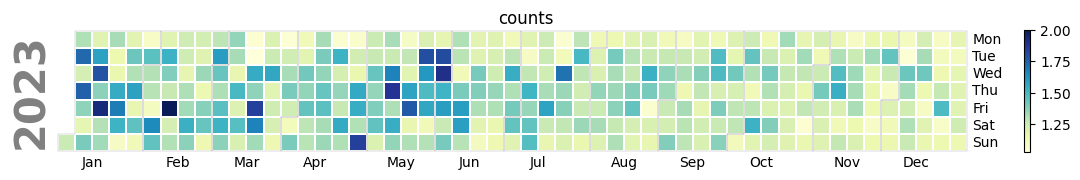

In [14]:
fig, ax = calplot.calplot(
        data=daily_after["counts"],
        how="mean",
        cmap="YlGnBu",
        # fillcolor="grey",
        suptitle="counts",
        linewidth=0.2,
    )

# fig.savefig("notAfter1.pdf", bbox_inches="tight")
fig.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

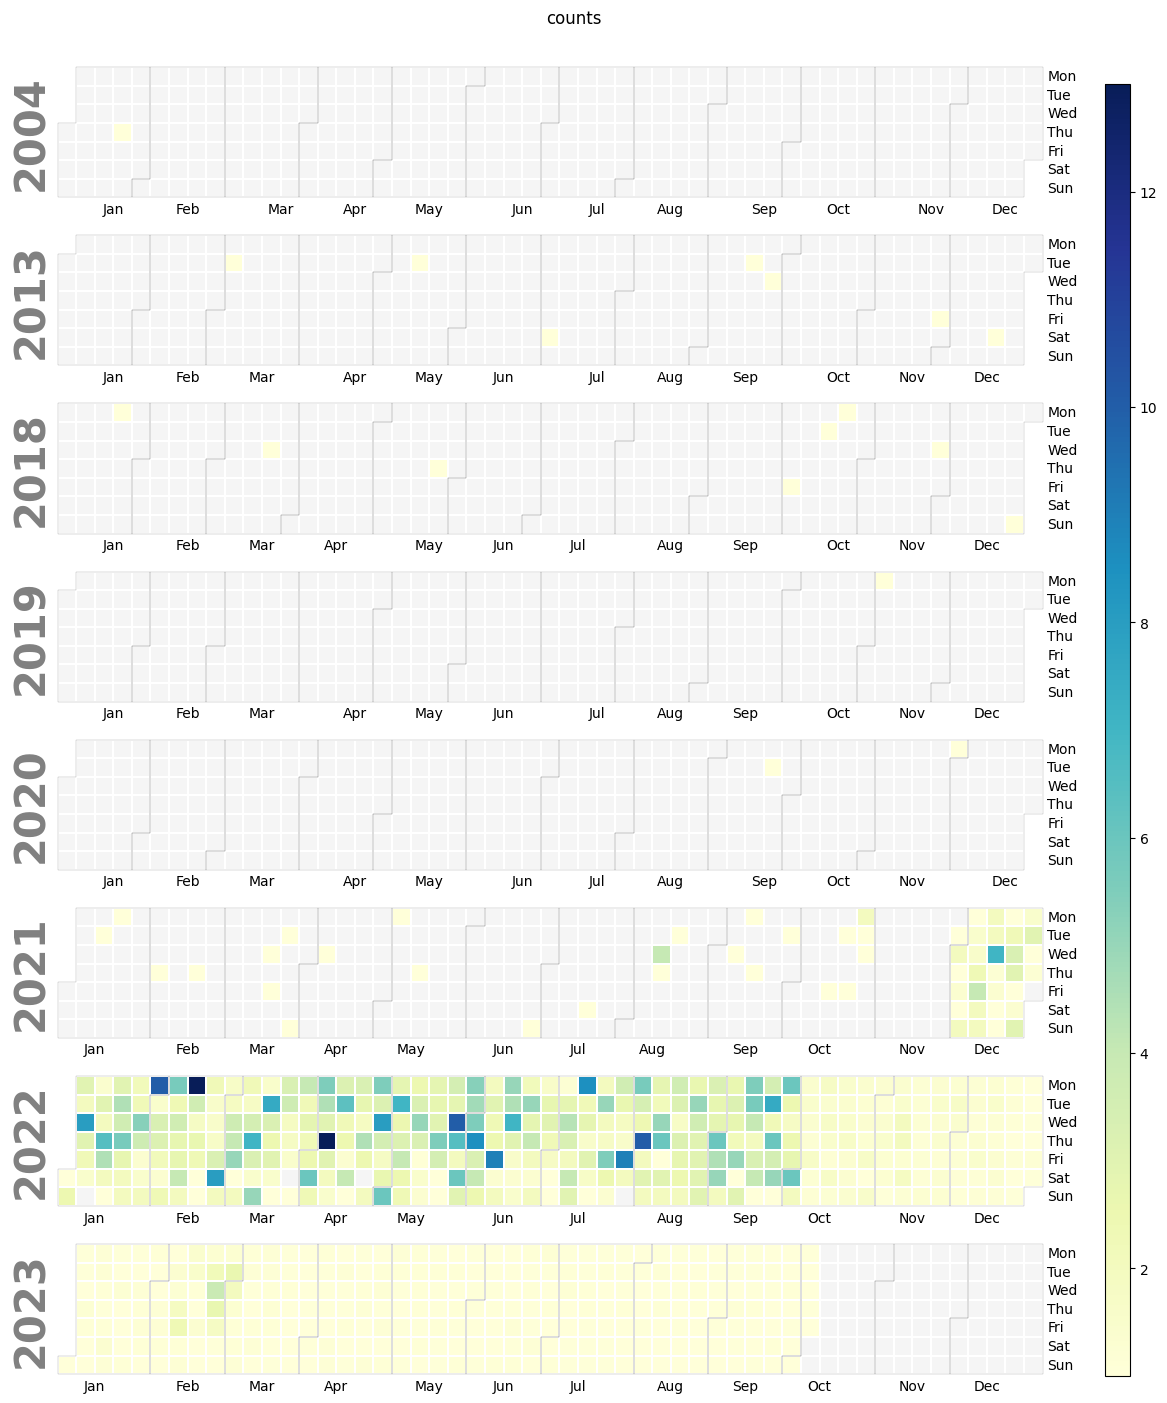

In [15]:
fig, ax = calplot.calplot(
        data=daily_before["counts"],
        how="mean",
        cmap="YlGnBu",
        # fillcolor="grey",
        suptitle="counts",
        linewidth=0.2,
    )

# fig.savefig("notBefore1.pdf", bbox_inches="tight")
fig.show()

In [16]:
indices = df[df.not_before_date < "2021-12-1"].index
df = df.drop(indices)

In [17]:
daily_after = df.not_after_date.value_counts().rename_axis('not_after_date').to_frame('counts')
daily_before = df.not_before_date.value_counts().rename_axis('not_before_date').to_frame('counts')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


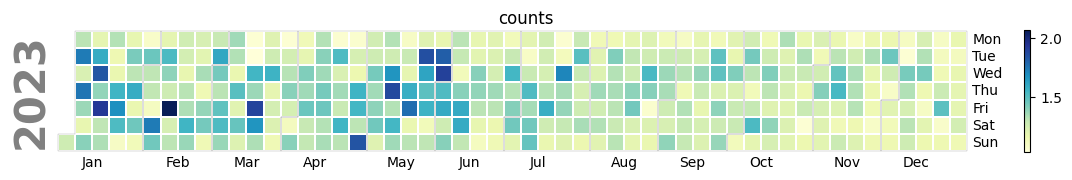

In [18]:
fig, ax = calplot.calplot(
        data=daily_after["counts"],
        how="mean",
        cmap="YlGnBu",
        # fillcolor="grey",
        suptitle="counts",
        linewidth=0.2,
    )

# fig.savefig("notAfter2.pdf", bbox_inches="tight")
fig.show()

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


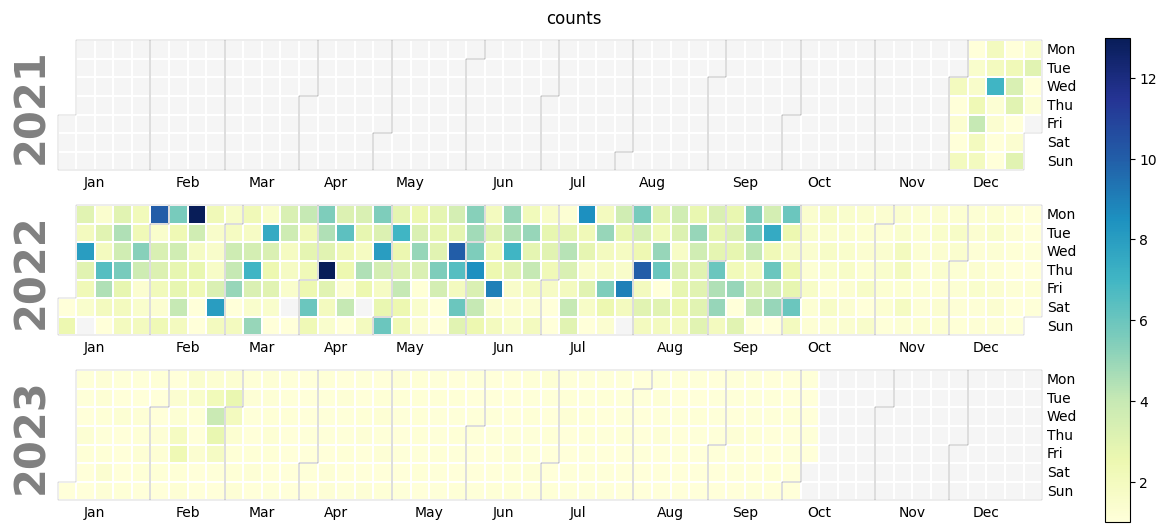

In [19]:

fig, ax = calplot.calplot(
        data=daily_before["counts"],
        how="mean",
        cmap="YlGnBu",
        # fillcolor="grey",
        suptitle="counts",
        linewidth=0.2,
    )
# fig.savefig("notBefore2.png", bbox_inches="tight")
fig.show()